<a href="https://colab.research.google.com/github/zharsuke/PCVK_Ganjil_2024/blob/master/WEEK3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum

### Import Library

In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### Linear Brightness Transformation

 Mengubah tingkat kecerahan citra 
-----------------------------------
Masukkan nilai kecerahan: 200


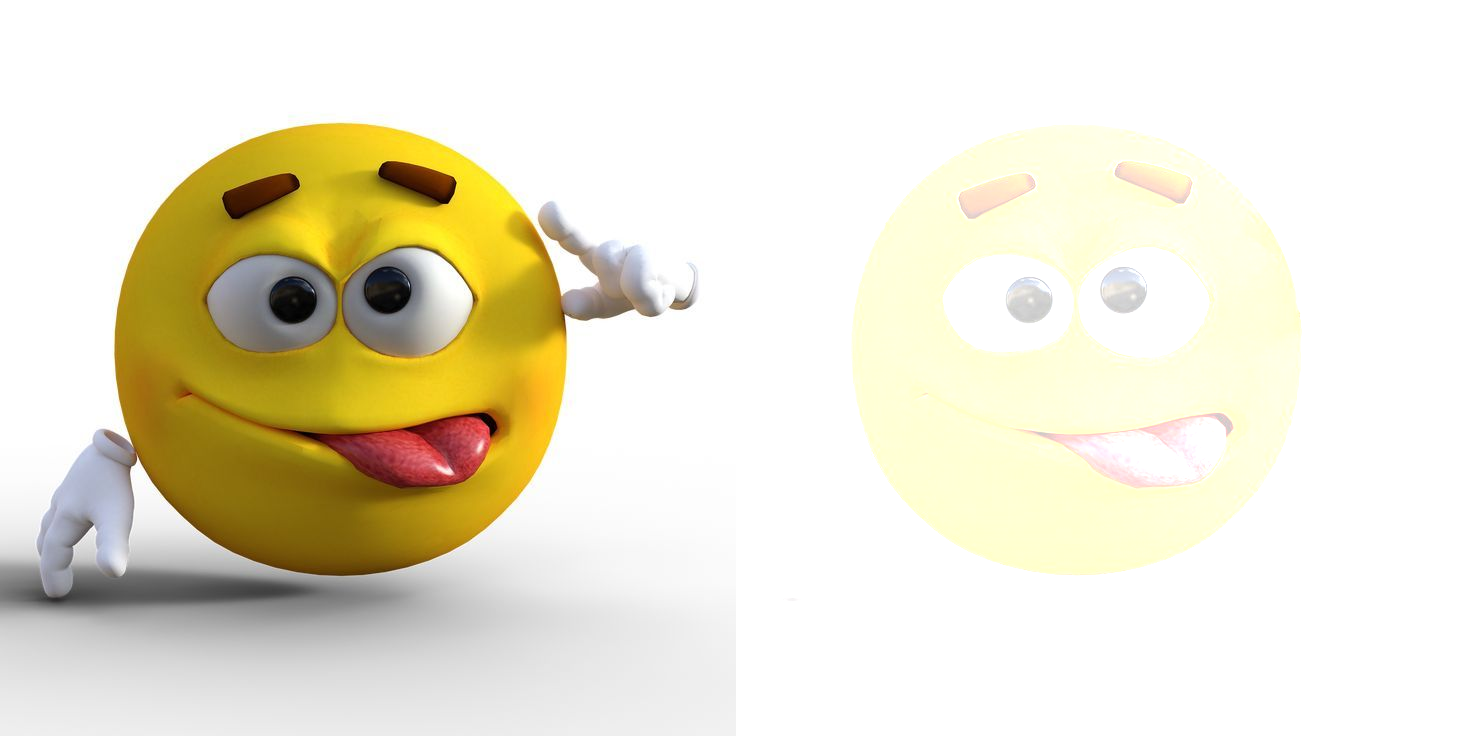

In [17]:
print(' Mengubah tingkat kecerahan citra ')
print('-----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('melet.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


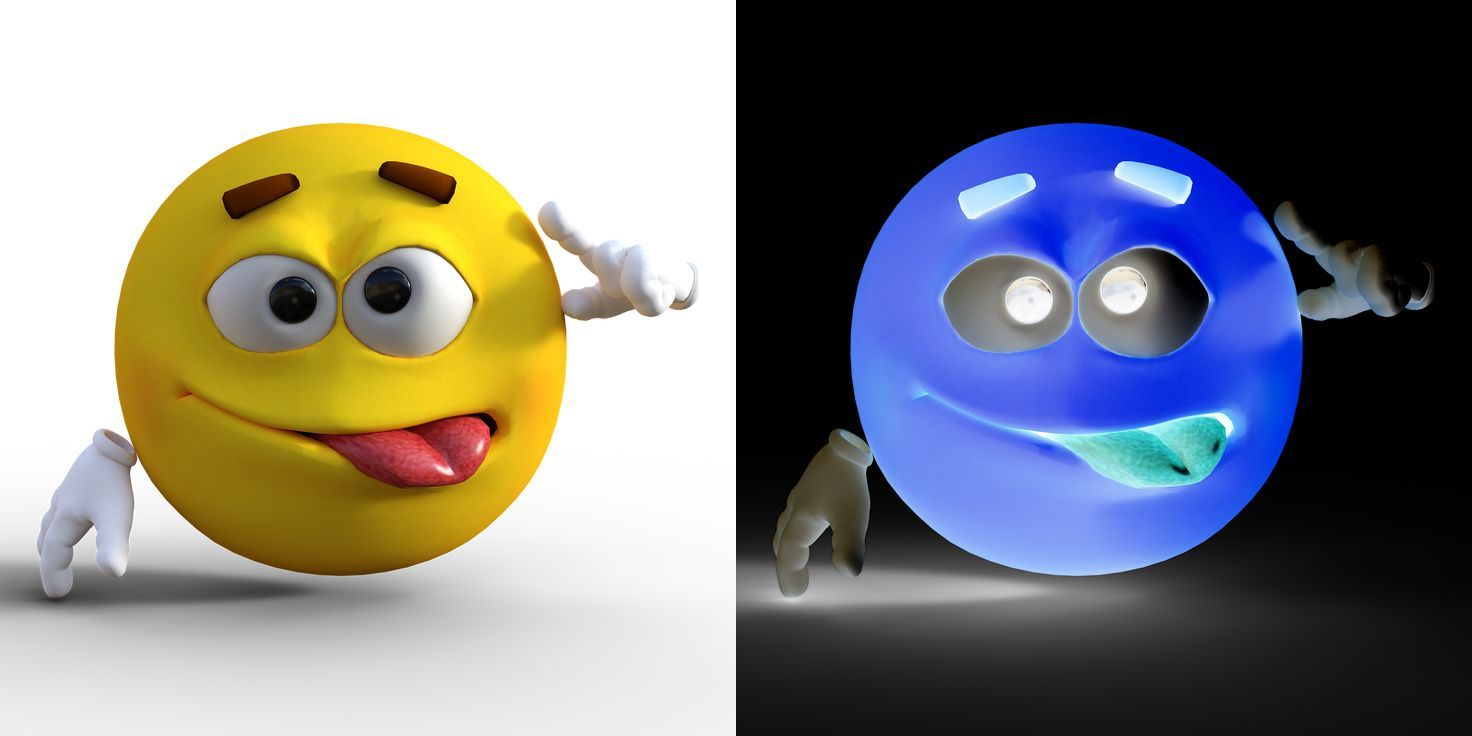

In [18]:
image_path = 'melet.jpeg'
original = cv.imread(image_path)


# Membalik citra (membuat citra negatif)
inverse_image = 255 - original

# Gabungkan gambar asli dan gambar yang di-inverse untuk perbandingan
final_frame = cv.hconcat([original, inverse_image])

# Tampilkan hasil citra asli dan citra negatif
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:


Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


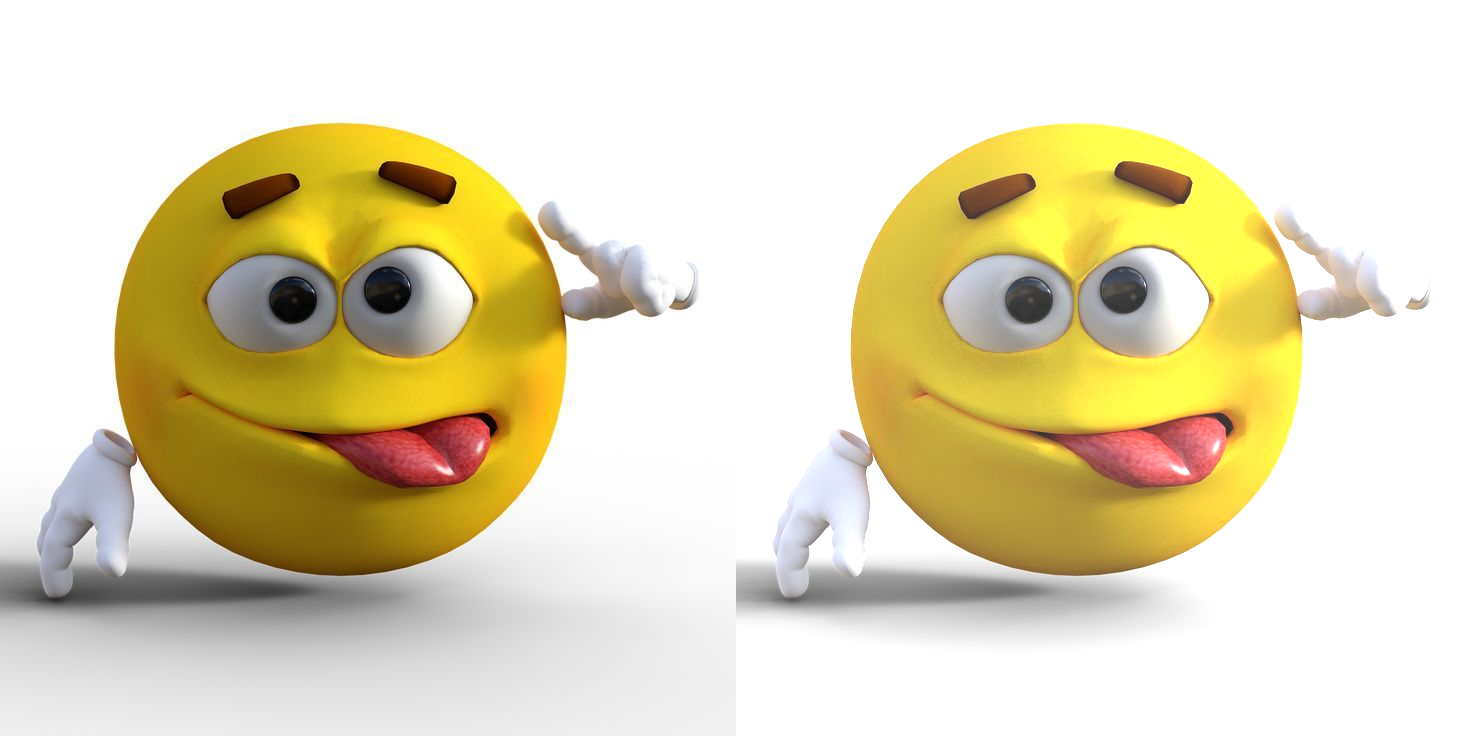

In [20]:
image_path = 'melet.jpeg'
original = cv.imread(image_path)
brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))

# Menghitung faktor koreksi kontras
factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

# Menerapkan transformasi brightness dan contrast per piksel
contrast_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      new_value = factor * (original[y, x, c] - 128) + 128 + brightness
      contrast_image[y, x, c] = np.clip(new_value, 0, 255)

# Gabungkan gambar asli dan gambar hasil transformasi untuk perbandingan
final_frame = cv.hconcat([original, contrast_image])

# Tampilkan hasilnya
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:


Masukkan nilai kecerahan: 
50


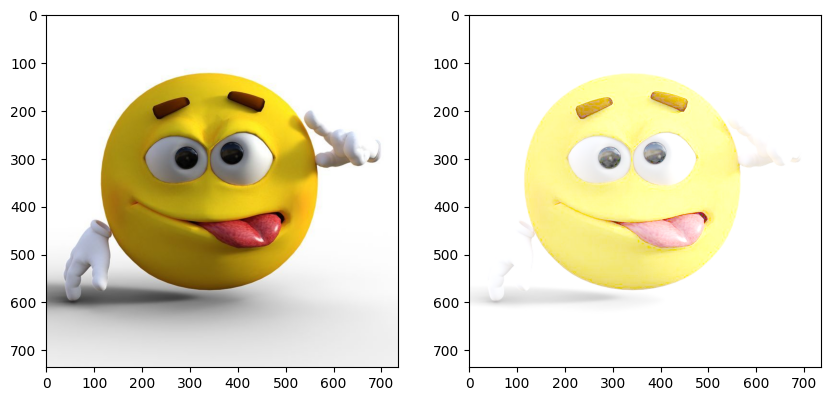

In [23]:
# Memuat gambar
img = cv.imread('melet.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Meminta input dari pengguna untuk nilai kecerahan
print("Masukkan nilai kecerahan: ")
c = float(input())

# Aplikasikan transformasi logaritmik
img_log = c * np.log1p(img)
img_log = np.clip(img_log, 0, 255)
img_log = img_log.astype(np.uint8)

# Menampilkan citra asli dan citra hasil transformasi log
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)

axs[1].imshow(img_log)

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averagin, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

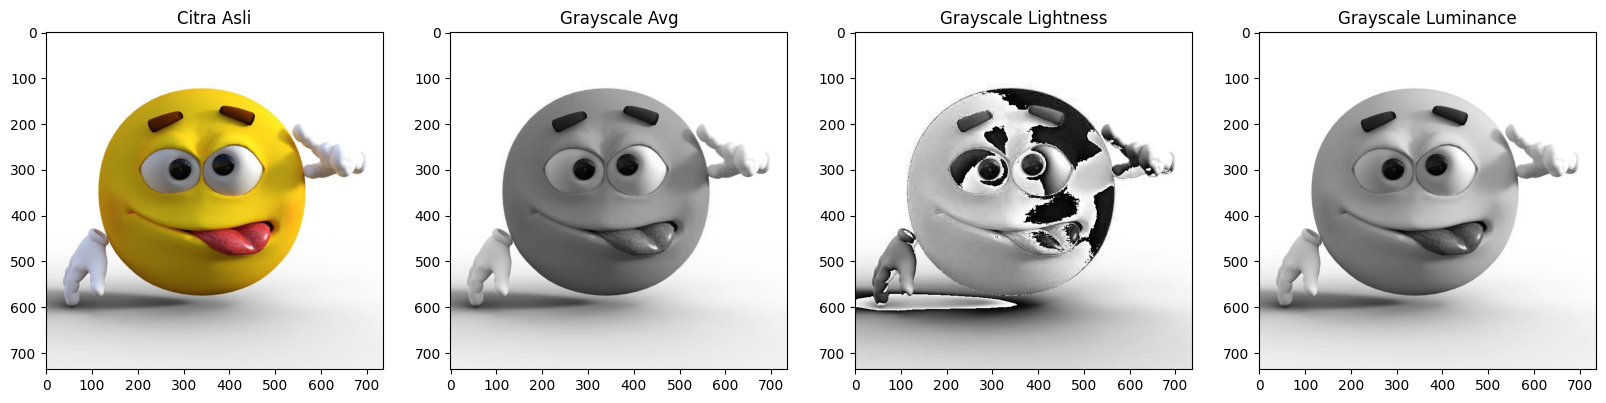

In [24]:
# Memuat gambar
img = cv.imread('melet.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale dengan metode rata-rata (average)
img_gray_avg = np.mean(img, axis=2).astype(np.uint8)

# Grayscale dengan metode lightness
img_gray_lightness = (np.max(img, axis=2) + np.min(img, axis=2)) // 2

# Grayscale dengan metode luminance
img_gray_luminance = (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)

# Menampilkan hasil
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_gray_avg, cmap='gray')
axs[1].set_title('Grayscale Avg')

axs[2].imshow(img_gray_lightness, cmap='gray')
axs[2].set_title('Grayscale Lightness')

axs[3].imshow(img_gray_luminance, cmap='gray')
axs[3].set_title('Grayscale Luminance')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

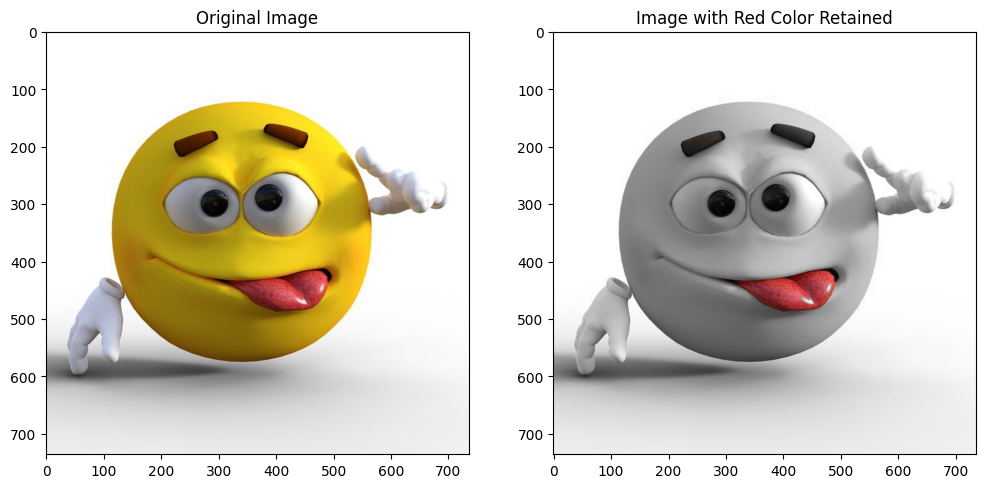

In [28]:
img = cv.imread('melet.jpeg')

# Konversi citra dari BGR ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Definisikan batas bawah dan atas untuk warna merah
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Buat mask untuk warna merah
mask1 = cv.inRange(hsv, lower_red1, upper_red1)
mask2 = cv.inRange(hsv, lower_red2, upper_red2)
mask = mask1 | mask2

# Mask invers untuk bagian yang bukan merah
mask_inverse = cv.bitwise_not(mask)

# Ekstrak bagian berwarna merah dan bagian grayscale
colored_part = cv.bitwise_and(img, img, mask=mask)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_3_channel = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray_part = cv.bitwise_and(gray_3_channel, gray_3_channel, mask=mask_inverse)

# Gabungkan bagian berwarna merah dengan bagian grayscale
result = cv.add(colored_part, gray_part)

# Konversi hasil dari BGR ke RGB
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Tampilkan citra asli dan hasil secara berdampingan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.title('Image with Red Color Retained')
plt.imshow(result_rgb)

plt.show()
